# Lanczos Kernel Interpolation

---

### Author: Marin lauber

In [2]:
import numpy as np
import matplotlib.pyplot as plt
try:
    plt.style.use("jupyter")
except OSError:
    print("Using default ploting style")

---

A field $s_i$ sampled at uniformly disctributrd points $i\in[1, \cdots, N]$ can be approximated at any point $x_j$ within this interval as a weighted sum all the sample point of the field

$$
    S(x_j) = \sum_{i=1}^{N}s(x_i)L(x_j-x_i)
$$

where $L(s)$ is the Lanczos kernel with compact support

$$
    L(s) = \begin{cases}
    \text{sinc}{(x)}\text{sinc}{(x/a)} \;\;\; \text{if  } -x < a < x,\\
    0 \qquad\qquad\qquad \text{otherwise}
    \end{cases}
$$

This gives the influence of each points of the field to the point where the value is seeked, $S(x_j)$. Increasing the order of the Kernel samples points further away from the sampling point.

In [3]:
def kernel(x, a=1):
    return np.where( abs(x) < a, np.sinc(abs(x))*np.sinc(abs(x)/a), 0.0)

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


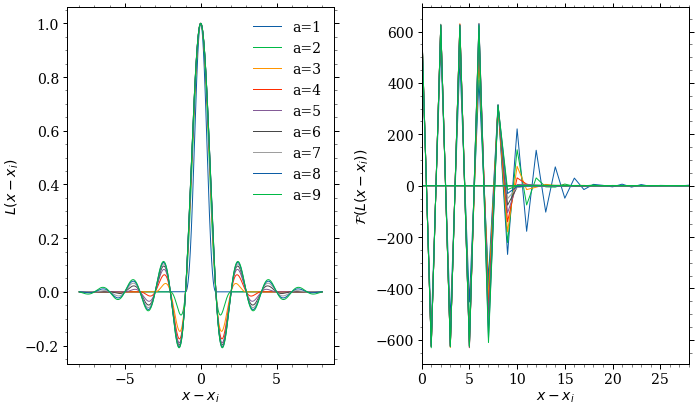

In [4]:
N = 10000
x = np.linspace(-8, 8, N)
fig, ax = plt.subplots(1, 2)
for i in range(1, 10, 1):
    ax[0].plot(x, kernel(x, i), label=f"a={i:.0f}")
    ax[1].plot(np.fft.fftfreq(N)*N, np.fft.fft(kernel(x, i)))
ax[1].set_xlim(0, 28)
ax[0].legend(); ax[0].set_xlabel(r"$x-x_i$"); ax[0].set_ylabel(r"$L(x-x_i)$")
ax[1].set_xlabel(r"$x-x_i$"); ax[1].set_ylabel(r"$\mathcal{F}(L(x-x_i))$")
plt.tight_layout();

In [5]:
def s(x, si, yi, kernel, a):
    
    if not callable(kernel):
        raise "Kernel must be callable()"
    
    # dyi might not be unity, rescale for kernel
    xs = x / (yi[1]-yi[0])
    ys = yi / (yi[1]-yi[0])
        
    L = kernel(ys-xs, a=a)

    return np.sum(si*L), L

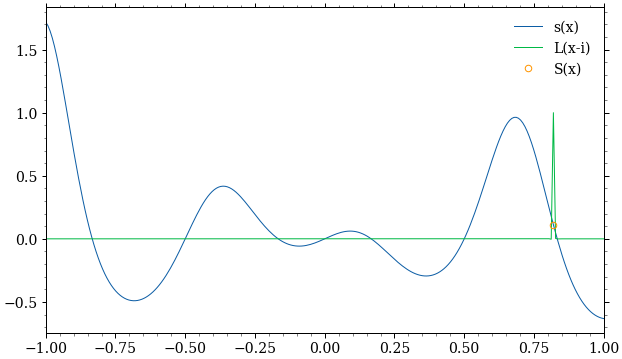

In [6]:
def f(x): return np.exp(x * np.cos(3 * x * np.pi))-1
yi = np.linspace(-1, 1, 256)
si = f(yi)
x = 2*np.random.rand(1)-1
sx, L = s(x, si, yi, kernel, 3)
plt.plot(yi, si, label="s(x)")
plt.plot(yi, L, label="L(x-i)")
plt.plot(x, sx,'o', label="S(x)")
plt.legend(); plt.xlim(yi[0], yi[-1]);

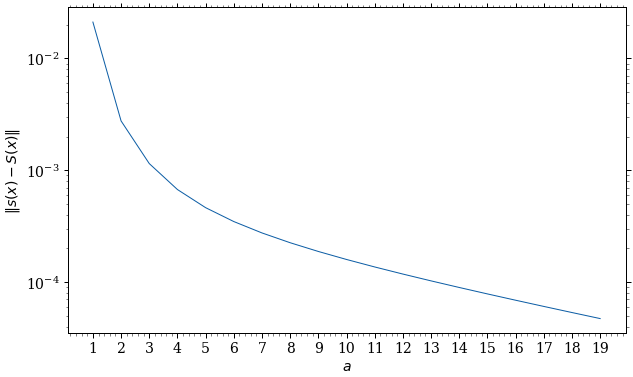

In [7]:
yi = np.linspace(-1, 1, 256)
si = f(yi)
x = 2*np.random.rand(1)-1
aS = np.arange(1, 20, 1)
error = aS*0.

for i, a in enumerate(aS):
    sx, _ = s(x, si, yi, kernel, a)
    error[i] = abs(f(x)- sx)
plt.semilogy(aS, error); plt.ylabel(r"$\Vert s(x) - S(x)\Vert$"); plt.xlabel(r"$a$")
plt.xticks(aS);

In [8]:
sinc = lambda x, a : np.sin(a*x)/(a*x)

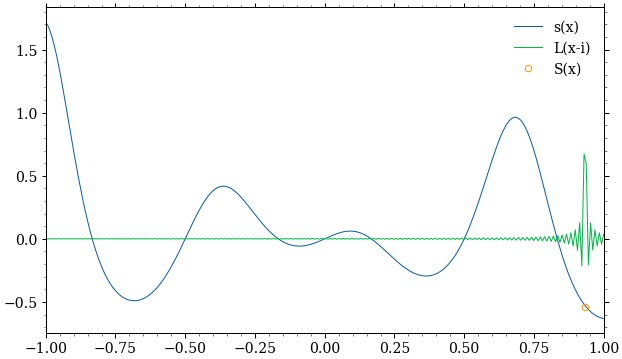

In [9]:
yi = np.linspace(-1, 1, 256)
si = f(yi)
x = 2*np.random.rand(1)-1
sx, L = s(x, si, yi, sinc, np.pi)
plt.plot(yi, si, label="s(x)")
plt.plot(yi, L, label="L(x-i)")
plt.plot(x, sx,'o', label="S(x)")
plt.legend(); plt.xlim(yi[0], yi[-1]);